# Exercises in statistics

## Exercise 3

Load in the data "energySoftware.csv" and answer the following questions:
1. Plot the distribution of CPU for each test type
2. Is there a difference in the CPU between bubblesort and bubblesort_ll? (note that the last name contains two small l's and not two capital i's) Justify your choice of test(s). 
3. Is there a difference in the CPU between bubblesort_func and bubblesort_ll2? Justify your choice of test(s). If there is a difference, how big is it?
4. When it comes to time, is there a difference between bubblesort and bubblesort_ll? Justify your choice of test(s).
5. Perform an ANOVA test to test if there is a difference in means across groups for CPU
6. Perform an ANOVA test to test if there is a difference in means across groups for time

In [39]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt

In [36]:
df = pd.read_csv('energySoftware.csv')
print(df.head())
df.describe()


         test       PKG       CPU  nn nn2   time
0  bubblesort  0.010986  0.009155          3.165
1  bubblesort  0.013184  0.010925          3.069
2  bubblesort  0.015198  0.009399          2.617
3  bubblesort  0.010559  0.009583          2.572
4  bubblesort  0.009949  0.009949          2.671


,PKG,CPU,time
count,1441.000000,1441.000000,1441.000000
mean,0.017618,0.015021,3.009384
std,0.004464,0.003192,0.571439
min,0.008179,0.007812,1.962000
25%,0.013733,0.012939,2.462000
50%,0.017761,0.015747,3.363000
75%,0.020874,0.017822,3.524000
max,0.026794,0.020325,4.244000


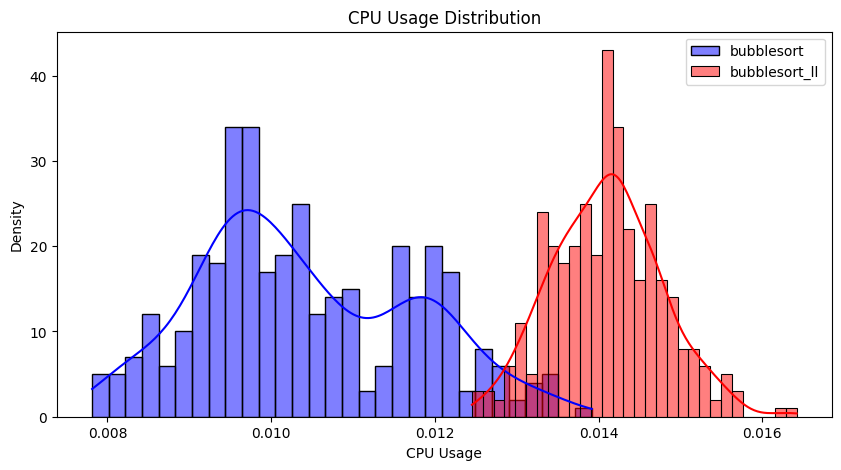

C:\Users\abjar\AppData\Local\Temp\ipykernel_16512\3072780438.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df[df["test"].isin(["bubblesort", "bubblesort_ll"])], x="test", y="CPU", palette="coolwarm")


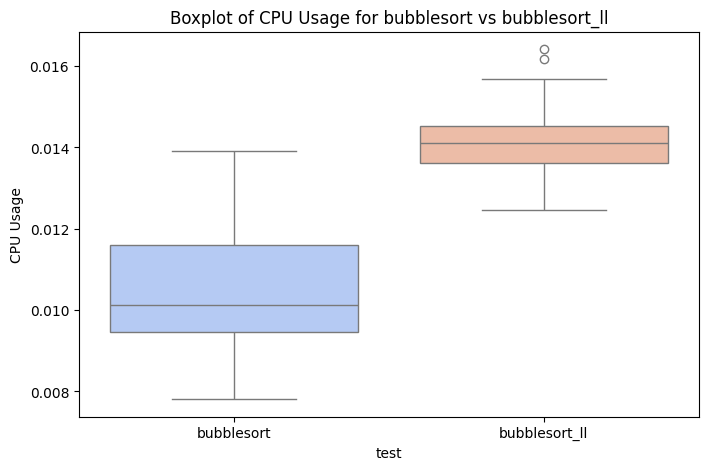

In [48]:
bubblesort_cpu = df[df["test"] == "bubblesort"]["CPU"]
bubblesort_ll_cpu = df[df["test"] == "bubblesort_ll"]["CPU"]

# Histogram with KDE
plt.figure(figsize=(10,5))
sns.histplot(bubblesort_cpu, kde=True, color="blue", label="bubblesort", bins=30, alpha=0.5)
sns.histplot(bubblesort_ll_cpu, kde=True, color="red", label="bubblesort_ll", bins=30, alpha=0.5)
plt.legend()
plt.title("CPU Usage Distribution")
plt.xlabel("CPU Usage")
plt.ylabel("Density")
plt.show()

# Boxplot to check for skewness & outliers
plt.figure(figsize=(8,5))
sns.boxplot(data=df[df["test"].isin(["bubblesort", "bubblesort_ll"])], x="test", y="CPU", palette="coolwarm")
plt.title("Boxplot of CPU Usage for bubblesort vs bubblesort_ll")
plt.ylabel("CPU Usage")
plt.show()


In [46]:
# Calculate variance
var_bubblesort = np.var(bubblesort_cpu, ddof=1)  # Sample variance
var_bubblesort_ll = np.var(bubblesort_ll_cpu, ddof=1)  # Sample variance

print("Variance of bubblesort:", var_bubblesort)
print("Variance of bubblesort_ll:", var_bubblesort_ll)

ratio = var_bubblesort / var_bubblesort_ll
print("Variance Ratio:", ratio)



Variance of bubblesort: 1.732791092036944e-06
Variance of bubblesort_ll: 4.381976482097817e-07
Variance Ratio: 3.954359634553291


In [45]:
# since variance ratio is < 4 we can assume equal variance and use the independent t-test
t_test = stats.ttest_ind(bubblesort_cpu, bubblesort_ll_cpu, equal_var=True)
print("T-test Result:", t_test)



T-test Result: TtestResult(statistic=np.float64(-47.4605163039462), pvalue=np.float64(9.831404686370246e-224), df=np.float64(719.0))


we have a very small p-value of ≈9.83e-224 which means that statistically there is a large difference in cpu usage 

Is there a difference in the CPU between bubblesort_func and bubblesort_ll2? Justify your choice of test(s). If there is a difference, how big is it?

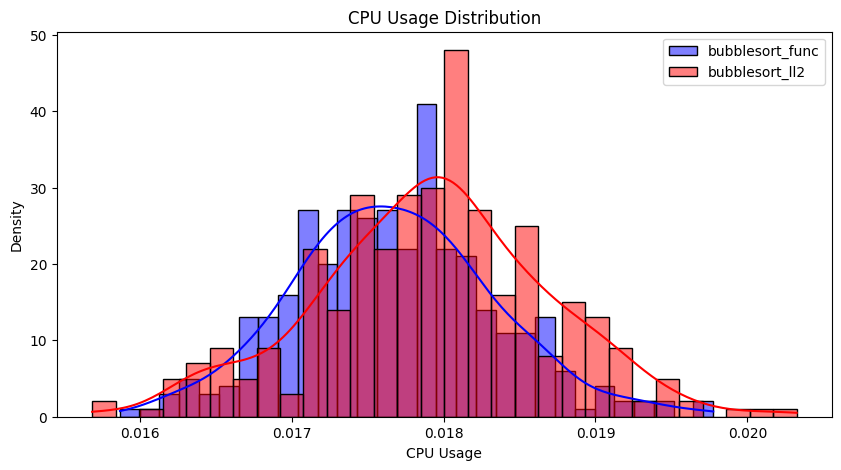

C:\Users\abjar\AppData\Local\Temp\ipykernel_16512\1200361737.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df[df["test"].isin(["bubblesort_func", "bubblesort_ll2"])], x="test", y="CPU", palette="coolwarm")


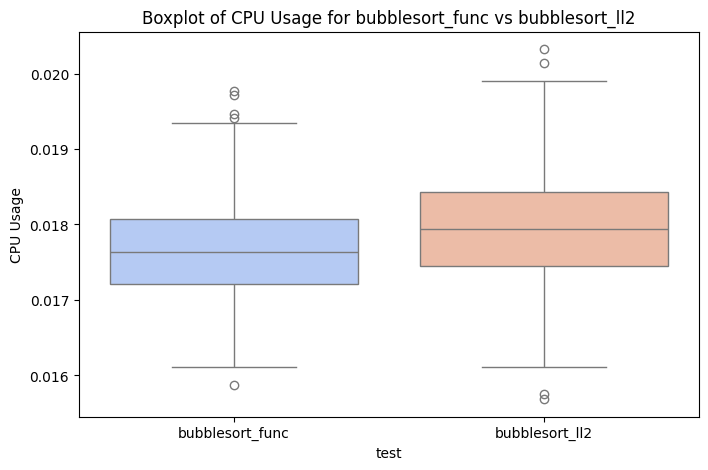

In [49]:
bubblesort_func_cpu = df[df["test"] == "bubblesort_func"]["CPU"]
bubblesort_ll2_cpu = df[df["test"] == "bubblesort_ll2"]["CPU"]

# Histogram with KDE
plt.figure(figsize=(10,5))
sns.histplot(bubblesort_func_cpu, kde=True, color="blue", label="bubblesort_func", bins=30, alpha=0.5)
sns.histplot(bubblesort_ll2_cpu, kde=True, color="red", label="bubblesort_ll2", bins=30, alpha=0.5)
plt.legend()
plt.title("CPU Usage Distribution")
plt.xlabel("CPU Usage")
plt.ylabel("Density")
plt.show()

# Boxplot to check for skewness & outliers
plt.figure(figsize=(8,5))
sns.boxplot(data=df[df["test"].isin(["bubblesort_func", "bubblesort_ll2"])], x="test", y="CPU", palette="coolwarm")
plt.title("Boxplot of CPU Usage for bubblesort_func vs bubblesort_ll2")
plt.ylabel("CPU Usage")
plt.show()


bubblesort_func and bubblesort_ll2 look very similarly distributed, but lets just calculate vairance of them

In [50]:
# Calculate variance
var_bubblesort_func = np.var(bubblesort_func_cpu, ddof=1)  # Sample variance
var_bubblesort_ll2 = np.var(bubblesort_ll2_cpu, ddof=1)  # Sample variance

print("Variance of bubblesort_func:", var_bubblesort_func)
print("Variance of bubblesort_ll2:", var_bubblesort_ll2)

ratio = var_bubblesort_func / var_bubblesort_ll2
print("Variance Ratio:", ratio)



Variance of bubblesort_func: 4.396875625570209e-07
Variance of bubblesort_ll2: 5.828401437579793e-07
Variance Ratio: 0.754387917966746


we have a very small variance ratio, so we can assume equal variance since it falls under the threshold of <4, so lets do a independent t-test

In [51]:
# since variance ratio is < 4 we can assume equal variance and use the independent t-test
t_test = stats.ttest_ind(bubblesort_func_cpu, bubblesort_ll2_cpu, equal_var=True)
print("T-test Result:", t_test)



T-test Result: TtestResult(statistic=np.float64(-4.692273179928857), pvalue=np.float64(3.2355729348933066e-06), df=np.float64(718.0))


here we have a larger p-value than before, but still under the threshold of <0.05, at ≈3.236e-06


When it comes to time, is there a difference between bubblesort and bubblesort_ll? Justify your choice of test(s).

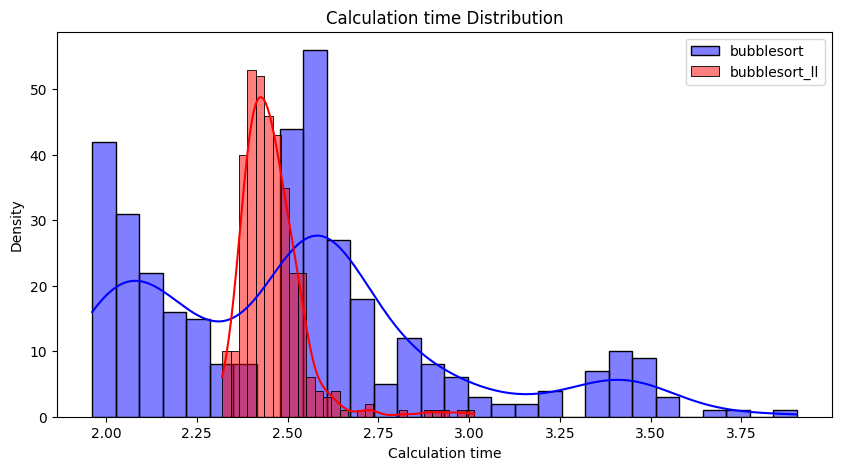

C:\Users\abjar\AppData\Local\Temp\ipykernel_16512\4277131441.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df[df["test"].isin(["bubblesort", "bubblesort_ll"])], x="test", y="time", palette="coolwarm")


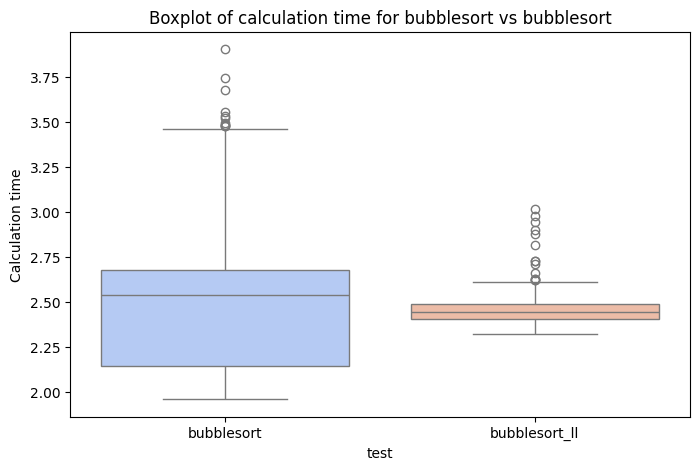

In [57]:
# Histogram with KDE
bubblesort_time = df[df["test"] == "bubblesort"]["time"]
bubblesort_ll_time = df[df["test"] == "bubblesort_ll"]["time"]

plt.figure(figsize=(10,5))
sns.histplot(bubblesort_time, kde=True, color="blue", label="bubblesort", bins=30, alpha=0.5)
sns.histplot(bubblesort_ll_time, kde=True, color="red", label="bubblesort_ll", bins=30, alpha=0.5)
plt.legend()
plt.title("Calculation time Distribution")
plt.xlabel("Calculation time")
plt.ylabel("Density")
plt.show()

# Boxplot to check for skewness & outliers
plt.figure(figsize=(8,5))
sns.boxplot(data=df[df["test"].isin(["bubblesort", "bubblesort_ll"])], x="test", y="time", palette="coolwarm")
plt.title("Boxplot of calculation time for bubblesort vs bubblesort")
plt.ylabel("Calculation time")
plt.show()


based on the plots, it looks like there is no normal distribution and neither variance nor distribution are similar, so lets just confirm by calculating varaiance and distribution ratio

In [58]:
import numpy as np

# Calculate variance
var_bubblesort_time = np.var(bubblesort_time, ddof=1)  # Sample variance
var_bubblesort_ll_time = np.var(bubblesort_ll_time, ddof=1)  # Sample variance

print("Variance of bubblesort_time:", var_bubblesort_time)
print("Variance of bubblesort_ll_time:", var_bubblesort_ll_time)

# Compute variance ratio
variance_ratio = max(var_bubblesort_time, var_bubblesort_ll_time) / min(var_bubblesort_time, var_bubblesort_ll_time)
print("Variance Ratio:", variance_ratio)


Variance of bubblesort_time: 0.17577931885195444
Variance of bubblesort_ll_time: 0.008048040730424018
Variance Ratio: 21.8412561193255


In [59]:
# Skewness and Kurtosis
print("Bubblesort Time Skewness:", bubblesort_time.skew())
print("Bubblesort Time Kurtosis:", bubblesort_time.kurtosis())

print("Bubblesort_ll Time Skewness:", bubblesort_ll_time.skew())
print("Bubblesort_ll Time Kurtosis:", bubblesort_ll_time.kurtosis())


Bubblesort Time Skewness: 0.7819232670903964
Bubblesort Time Kurtosis: 0.2414949000033717
Bubblesort_ll Time Skewness: 2.6897668670150843
Bubblesort_ll Time Kurtosis: 11.786716058095365


looking at the variance between the samples as well as the skewness of both (though mostly bubblesort_ll) samples, we should use the mann-whiteney U test, to test correlation

In [60]:
mann_whitney = stats.mannwhitneyu(bubblesort_time, bubblesort_ll_time, alternative='two-sided')
print("Mann-Whitney U Test Result:", mann_whitney)

Mann-Whitney U Test Result: MannwhitneyuResult(statistic=np.float64(74960.0), pvalue=np.float64(0.00035855213302219286))


looking at the p-value of ≈0.000359, there is a significant difference between bubblesort and bubblesort_ll in calculation time 

though since the mann-whitney u test compares rankings and not means lets calculate the medians and compare them, the one with the lower median will be the faster one 

In [61]:
median_bubblesort = bubblesort_time.median()
median_bubblesort_ll = bubblesort_ll_time.median()

print("Median Calculation Time - Bubblesort:", median_bubblesort)
print("Median Calculation Time - Bubblesort_ll:", median_bubblesort_ll)


Median Calculation Time - Bubblesort: 2.541
Median Calculation Time - Bubblesort_ll: 2.443


looking at this calculation, as well as the prior calculations, bubblesort_ll is statistically the faster than bubblesort. 

Perform an ANOVA test to test if there is a difference in means across groups for CPU

since we have 4 groups, we can do an ANOVA test on the different groups 

In [66]:
# Extract CPU values for each test type
grouped_data = [df[df["test"] == test]["CPU"] for test in df["test"].unique()]

# Perform ANOVA
anova_result = stats.f_oneway(*grouped_data)
print("ANOVA Test Result(cpu):", anova_result)


ANOVA Test Result(cpu): F_onewayResult(statistic=np.float64(5641.93769602928), pvalue=np.float64(0.0))


based on the ANOVA test we can see that there is a significant difference in mean based on the p-value of 0.0

Perform an ANOVA test to test if there is a difference in means across groups for cpu usage

same goes for time, since there are 4 groups we can do an ANOVA test here too 

In [71]:
# Extract CPU values for each test type
grouped_data = [df[df["test"] == test]["time"] for test in df["test"].unique()]

# Perform ANOVA
anova_result = stats.f_oneway(*grouped_data)
print("ANOVA Test Result(time):", anova_result)

ANOVA Test Result(time): F_onewayResult(statistic=np.float64(2556.332935412784), pvalue=np.float64(0.0))


with a p-value of 0 here as well, we can see that there also is a significant difference across groups for time 